In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
from api_keys import weather_api_key

In [3]:
from citipy import citipy

In [4]:
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hami
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | yicheng
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | mayuge
Processing Record 8 of Set 1 | mazar-e sharif
Processing Record 9 of Set 1 | zouerate
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | scarborough
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | ji'an
Processing Record 22 of Set 1 | tapa
Processing Record 23 o

Processing Record 42 of Set 4 | quesnel
Processing Record 43 of Set 4 | san felice circeo
Processing Record 44 of Set 4 | anajatuba
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | buka
Processing Record 47 of Set 4 | margaret river
Processing Record 48 of Set 4 | amos
Processing Record 49 of Set 4 | burang
Processing Record 0 of Set 5 | neiafu
Processing Record 1 of Set 5 | akjoujt
Processing Record 2 of Set 5 | yuzhno-kurilsk
Processing Record 3 of Set 5 | isafjordur
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | tomarza
Processing Record 6 of Set 5 | anaco
Processing Record 7 of Set 5 | chui
Processing Record 8 of Set 5 | colotlan
Processing Record 9 of Set 5 | wailua homesteads
Processing Record 10 of Set 5 | itaituba
Processing Record 11 of Set 5 | cinisi
Processing Record 12 of Set 5 | mahabe
City not found. Skipping...
Processing Record 13 of Set 5 | queenstown
Processing Record 14 of Set 5 | faya-largeau
Processing Record 15 of Se

Processing Record 31 of Set 8 | sete lagoas
Processing Record 32 of Set 8 | al kharijah
Processing Record 33 of Set 8 | minas de marcona
Processing Record 34 of Set 8 | new norfolk
Processing Record 35 of Set 8 | mcalester
Processing Record 36 of Set 8 | oudtshoorn
Processing Record 37 of Set 8 | nueva gerona
Processing Record 38 of Set 8 | okondja
Processing Record 39 of Set 8 | serenje
Processing Record 40 of Set 8 | puerto ayacucho
Processing Record 41 of Set 8 | jumla
Processing Record 42 of Set 8 | acapulco de juarez
Processing Record 43 of Set 8 | tofol
Processing Record 44 of Set 8 | kabinda
Processing Record 45 of Set 8 | laihia
Processing Record 46 of Set 8 | bandar
Processing Record 47 of Set 8 | northam
Processing Record 48 of Set 8 | tan-tan
Processing Record 49 of Set 8 | fortuna
Processing Record 0 of Set 9 | runaway bay
Processing Record 1 of Set 9 | puerto leguizamo
Processing Record 2 of Set 9 | nagqu
Processing Record 3 of Set 9 | chunskiy
Processing Record 4 of Set 9

Processing Record 21 of Set 12 | mapimi
Processing Record 22 of Set 12 | kafue
Processing Record 23 of Set 12 | northampton
Processing Record 24 of Set 12 | qacha's nek
Processing Record 25 of Set 12 | tapes
Processing Record 26 of Set 12 | zemio
Processing Record 27 of Set 12 | bintulu
Processing Record 28 of Set 12 | tsiombe
Processing Record 29 of Set 12 | sovetskaya gavan'
Processing Record 30 of Set 12 | qionghai
Processing Record 31 of Set 12 | quellon
Processing Record 32 of Set 12 | birao
Processing Record 33 of Set 12 | brokopondo
Processing Record 34 of Set 12 | port-vila
Processing Record 35 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 36 of Set 12 | kendari
Processing Record 37 of Set 12 | santa vitoria do palmar
Processing Record 38 of Set 12 | vila franca do campo
Processing Record 39 of Set 12 | valledupar
Processing Record 40 of Set 12 | frankfort
Processing Record 41 of Set 12 | posto fiscal rolim de moura
Processing Record 42 of Set 12 | coracao 

In [26]:
city_weather_data = pd.DataFrame(city_data)

In [27]:
city_weather_data.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [28]:
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,28.53,66,0,1.79,US,1690295495
1,hami,42.8000,93.4500,32.64,10,0,6.69,CN,1690295738
2,west island,-12.1568,96.8225,24.99,73,40,8.23,CC,1690295667
3,yicheng,31.3705,119.8703,27.62,88,100,5.51,CN,1690295739
4,la passe,45.5549,-0.8967,24.13,56,11,7.94,FR,1690295739


In [29]:
city_weather_data.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
city_weather_data = pd.read_csv("output_data/cities.csv", index_col="City_ID")

In [31]:
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,28.53,66,0,1.79,US,1690295495
1,hami,42.8000,93.4500,32.64,10,0,6.69,CN,1690295738
2,west island,-12.1568,96.8225,24.99,73,40,8.23,CC,1690295667
3,yicheng,31.3705,119.8703,27.62,88,100,5.51,CN,1690295739
4,la passe,45.5549,-0.8967,24.13,56,11,7.94,FR,1690295739


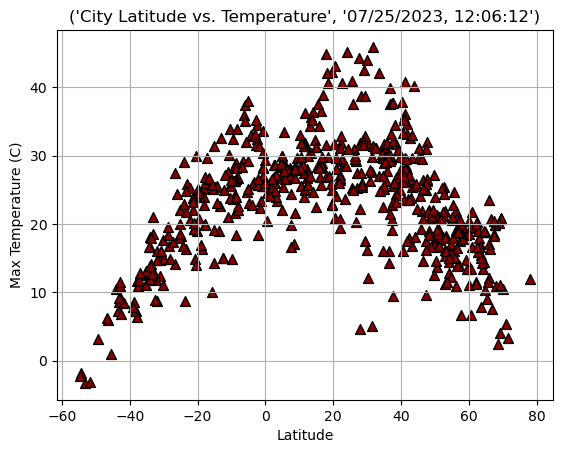

In [53]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Max Temp"],c= "darkred",marker = "^",s = 50, edgecolors= "black")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

current_time = time.localtime()
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", current_time)
title = "City Latitude vs. Temperature", time_string
plt.title(title)
plt.grid()


plt.savefig("output_data/Fig1.png")

plt.show()

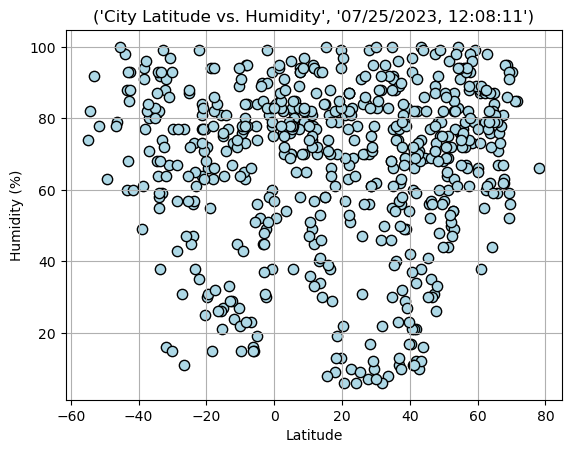

In [55]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Humidity"],c= 'lightblue',marker = 'o', s = 55, edgecolors= 'black')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

current_time = time.localtime()
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", current_time)
title = "City Latitude vs. Humidity", time_string
plt.title(title)
plt.grid()

plt.savefig("output_data/Fig2.png")

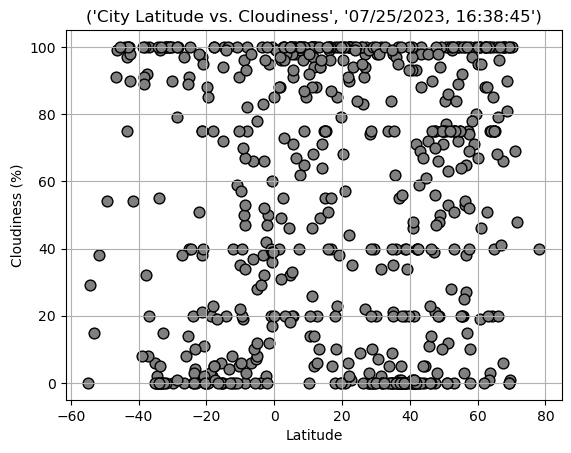

In [59]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Cloudiness"],c= "grey",marker = "o", s = 60, edgecolors= "black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

current_time = time.localtime()
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", current_time)
title = "City Latitude vs. Cloudiness", time_string
plt.title(title)
plt.grid()

plt.savefig("output_data/Fig3.png")


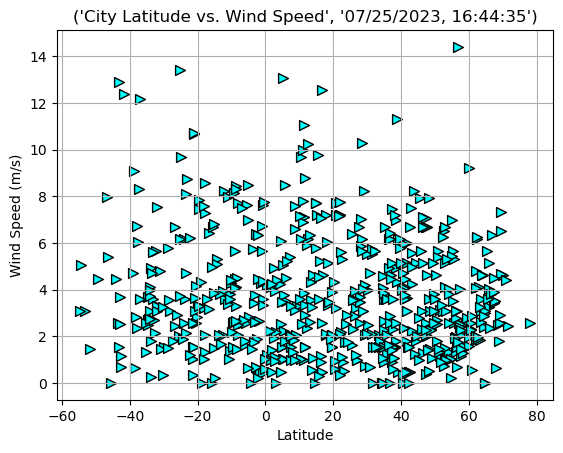

In [63]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Wind Speed"],c= "cyan",marker = ">", s = 50, edgecolors= "black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

current_time = time.localtime()
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", current_time)
title = "City Latitude vs. Wind Speed", time_string
plt.title(title)
plt.grid()

plt.savefig("output_data/Fig4.png")

In [86]:
def linear_regression(xvalue,yvalue,xlabel,ylabel,xcoord,ycoord):

    (slope, intercept,rvalue,pvalue,stderr) = linregress(xvalue,yvalue)
    regres = (slope * xvalue) + intercept
    print(f"The r-value is: {rvalue}")    
    plt.scatter(xvalue, yvalue) 
    
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(xcoord,ycoord),fontsize=15,color="purple")
    plt.plot(xvalue,regres,'r-')
    

In [87]:
northern_hem = city_weather_data.loc[city_weather_data["Lat"] >=0 ]

In [88]:
northern_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,28.53,66,0,1.79,US,1690295495
1,hami,42.8000,93.4500,32.64,10,0,6.69,CN,1690295738
3,yicheng,31.3705,119.8703,27.62,88,100,5.51,CN,1690295739
4,la passe,45.5549,-0.8967,24.13,56,11,7.94,FR,1690295739
6,mayuge,0.4597,33.4803,24.51,52,99,4.19,UG,1690295739


In [89]:
southern_hem = city_weather_data.loc[city_weather_data["Lat"] <=0 ]

In [90]:
southern_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,24.99,73,40,8.23,CC,1690295667
5,chonchi,-42.6128,-73.8092,8.95,93,90,0.68,CL,1690295590
9,waitangi,-43.9535,-176.5597,10.46,98,100,4.47,NZ,1690295646
12,grytviken,-54.2811,-36.5092,-1.75,82,29,5.06,GS,1690295642
16,edinburgh of the seven seas,-37.0676,-12.3116,12.46,80,100,12.15,SH,1690295650


The r-value is: -0.5711900555197446


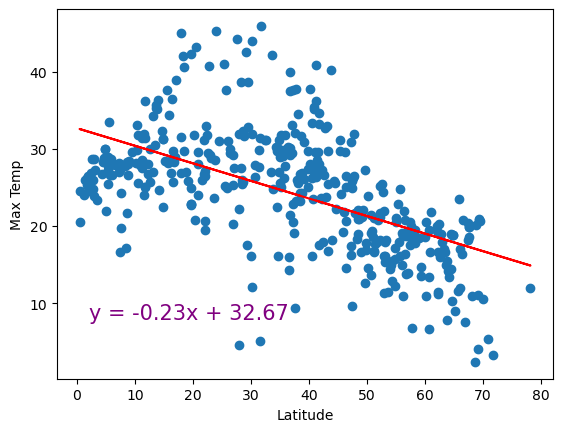

In [95]:
linear_regression(northern_hem["Lat"],northern_hem["Max Temp"],"Latitude","Max Temp",2,8)

The r-value is: 0.8541244050692841


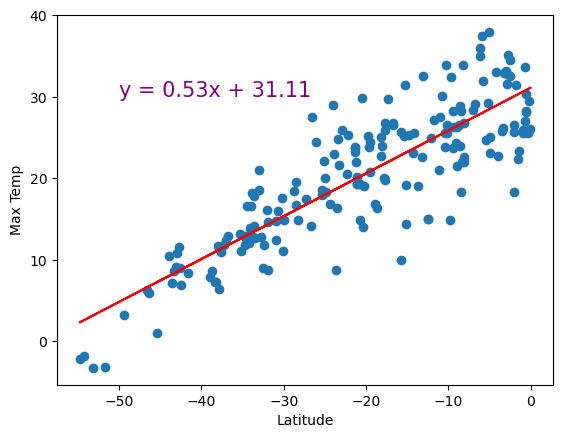

In [96]:
linear_regression(southern_hem["Lat"],southern_hem["Max Temp"],"Latitude","Max Temp",-50,30)

The r-value is: 0.04898757144217285


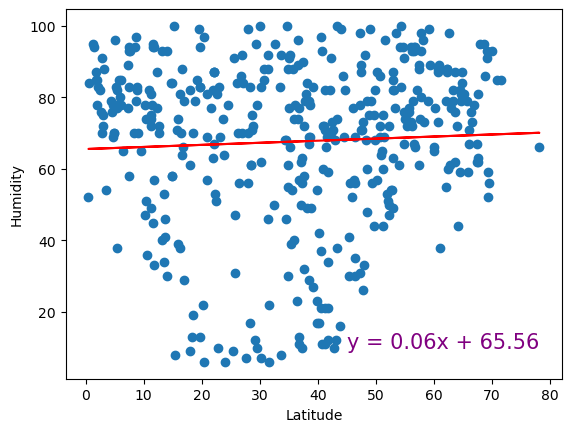

In [97]:
linear_regression(northern_hem["Lat"],northern_hem["Humidity"],"Latitude","Humidity",45,10)

The r-value is: -0.23826922210427384


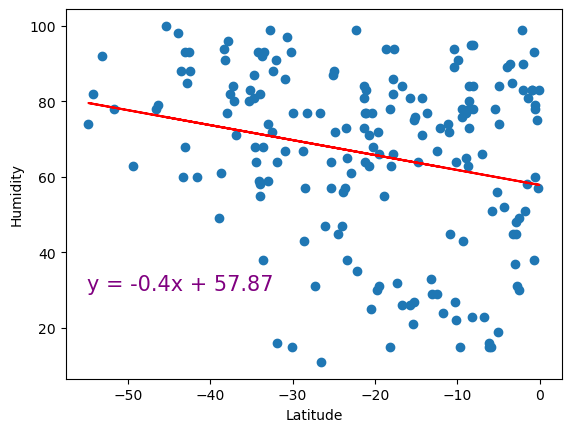

In [101]:
linear_regression(southern_hem["Lat"],southern_hem["Humidity"],"Latitude","Humidity",-55,30)

The r-value is: -0.08541981658135755


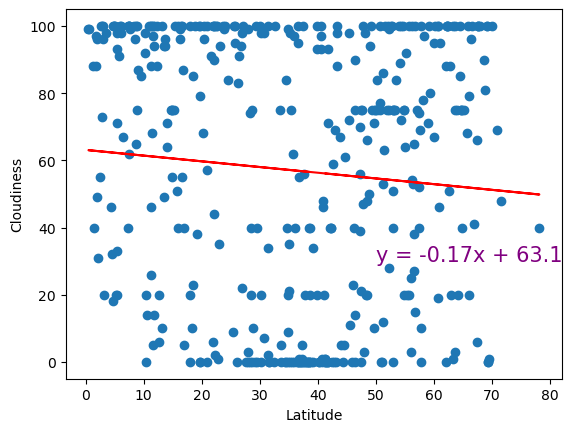

In [103]:
linear_regression(northern_hem["Lat"],northern_hem["Cloudiness"],"Latitude","Cloudiness",50,30)

The r-value is: -0.11825754303731409


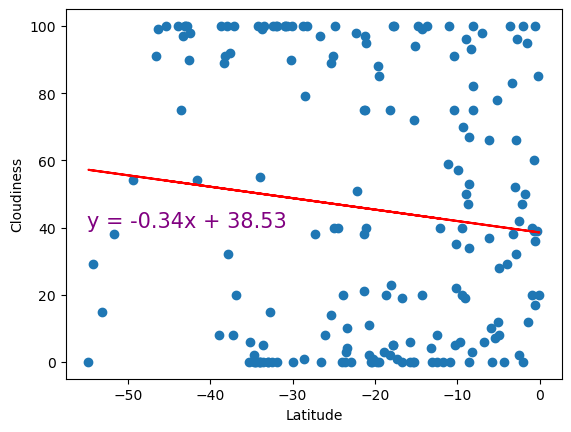

In [105]:
linear_regression(southern_hem["Lat"],southern_hem["Cloudiness"],"Latitude","Cloudiness",-55,40)

The r-value is: -0.07815060940047927


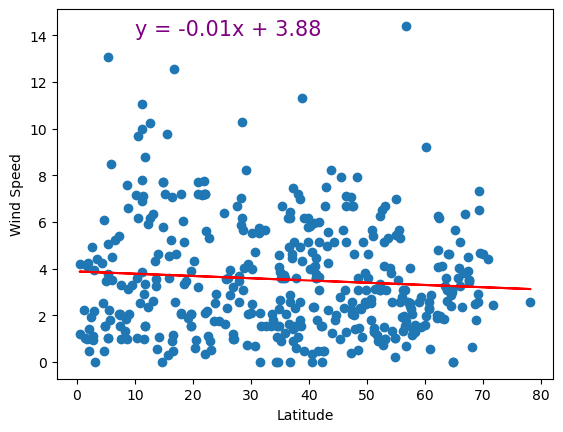

In [110]:
linear_regression(northern_hem["Lat"],northern_hem["Wind Speed"],"Latitude","Wind Speed",10,14)

The r-value is: -0.06115876045702195


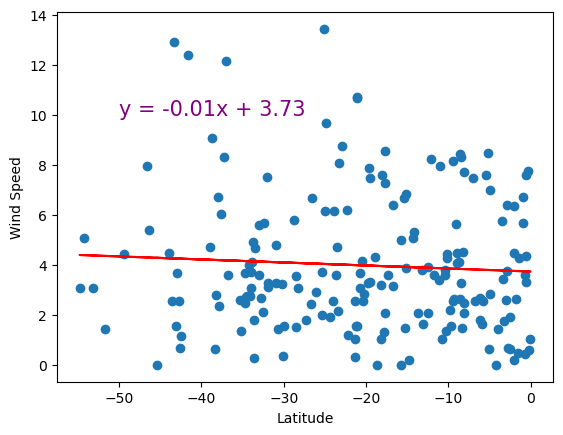

In [115]:
linear_regression(southern_hem["Lat"],southern_hem["Wind Speed"],"Latitude","Wind Speed",-50,10)

In [116]:
#Discussion about the linear relationship: There is a slight correlation between the Northern Hemisphere and Southern Hemisphere
# in regards their Cloudiness as well as their Wind Speed